# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import scipy.stats as sps
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set()

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/aldenchico/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


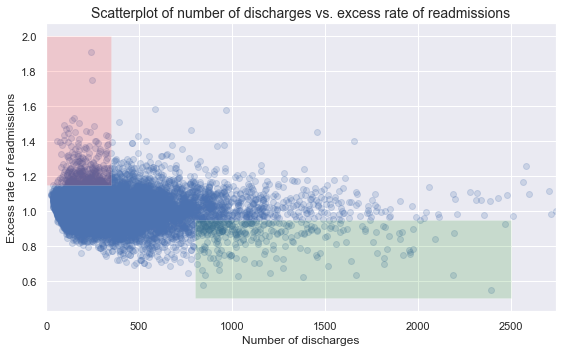

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Do you agree with the above analysis and recommendations? Why or why not?

In the anaylsis above, the person who wrote the initial report claimed, "There is a significant correlation between hospital capacity (number of discharges) and readmission rates." To test this claim, I wanted to find the correlation coefficient between number of discharges and readmission rates to see if their claim was true. The Pearson correlation coefficent is a statistic that measures the covariance between two variables versus their individual variances. The coefficient ranges from -1 to 1 and the two variables relate more closely if the absolute value of the correlation coefficient is closer to 1. If the original author's original claim is to be considered true, then the absolute value of the correlation coefficient between the discharge frequency and readmission rate should be greater than or equal to 0.5.

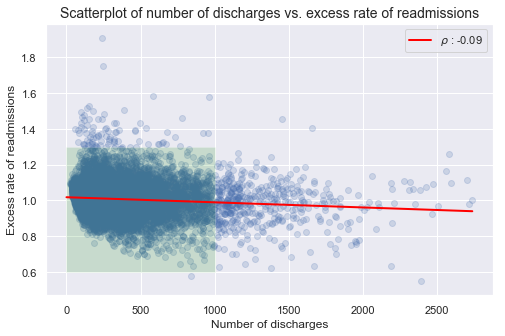

 The Pearson Correlation Coefficient for this sample is -0.09 


In [10]:
# Use the same discharge and readmission data from the original scatter plot to test the claim
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

# Find the linear regression between number of discharges and hospital readmission rate
slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(0, max(x),100)
y_line = slope * x_line + intercept

# Find the Pearson correlation coefficient matrix between the two variables
rho = np.corrcoef(x, y)

# Plot the linear regression along with the original scatter plot
_ = plt.figure(figsize=(8,5))
_ = plt.scatter(x, y, alpha=0.2)
_ = plt.plot(x_line, y_line, color='red', linewidth=2, label=r'$\rho$ : -0.09')
_ = plt.legend(loc='upper right')
_ = plt.fill_between([0,1000], .6, 1.3, facecolor='green', alpha = .15, interpolate=True)

# Provide labels for the figure
_ = plt.xlabel('Number of discharges', fontsize=12)
_ = plt.ylabel('Excess rate of readmissions', fontsize=12)
_ = plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Display the results
plt.show()
print(f' The Pearson Correlation Coefficient for this sample is {rho[0][1]:.2f} ')

After taking the correlation coefficient between the discharge frequency and the hospital readmission rate, we find that their Pearson correlation coefficient is -0.09. This value suggests that the two variables are not closely correlated like the author suggests. The red line shows the linear regression between the two variables. Since the data is mostly clustered around 0-1000 discharges with a rate of readmission lying anywhere between roughly 0.6-1.3, we cannot confidently say that less discharges leads to greater readmission rate since less discharges can also lead to lower readmission rates. 

To validate our point, we can construct a Null Hypothesis Test to determine if the hospital discharge rate is correlated to readmission rate. For this test, we are going to assume that the Pearson correlation coefficient is less than or equal to -0.5 which suggests that the two variables are negatively correlated to represent the author's conclusion that the number of discharges and excess rate of readmissions are correlated. Our alternative hypothesis is that the correlation coefficient is between -0.5 and 0 which suggests that the two variables are not closely correlated. If our observation is outside a 99% confidence interval from our assumption, then we will reject the Null Hypothesis in favor for the alternative.

H<sub>0</sub>: $-1 \leq \rho \leq -0.5$

H<sub>a</sub>: $-0.5 < \rho \leq 0$

To perform this test using the data that we collected, we can sample with replacement from the number of discharges and hospital readmission rate data to create bootstrap sample pairs. These bootstrap sample pairs can then be used to generate bootstrap replicate Pearson correlation coefficients whose distribution is roughly normal. The normal distribution is accredited to the Central Limit Theorem that states that the distribution of 30 samples for the same test statistic is approximately normal. Using the normal distribution of 1,000 sample Pearson correlation coefficients, we can then find a confidence interval where 99% of the sample Pearson correlation coefficients lie. If our observation lies outside this confidence interval, we will reject the notion that the hospital discharge rate is correlated to hospital readmission rate.

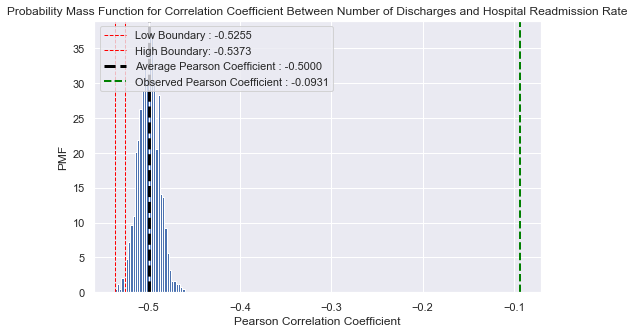

Average Pearson Correlation Coefficient is -0.5000
Standard Deviation for the Distribution is 0.0115
99% Confidence Interval for the Pearson Correlation Coefficient is Between -0.5255 and -0.5373
Observed P-Value is 1.0000
Observed Z-Score is 35


In [13]:
np.random.seed(42)

# Prepare bootstrap replicate array for bootstrap testing
size = 1000
bs_replicates = np.empty(size)
inds = np.arange(len(x))
rho_not = -0.5
rho_obs = rho[0][1]

for i in range(size):
    # Generate bootstrap pairing samples for no. of discharges and rate of readmission
    bs_inds = np.random.choice(inds, len(inds)) 
    bs_x = [x[j] for j in bs_inds]
    bs_y = [y[j] for j in bs_inds]
    
    # Generate the Pearson correlation coefficient to measure correlation centered around 0.5
    bs_rep = np.corrcoef(bs_x, bs_y)[0][1]  - rho_obs + rho_not
    bs_replicates[i] = bs_rep

# Find the summary statistics from our bootstrap replicates with a 99% confidence interval
mean_reps = np.mean(bs_replicates)
std_reps = np.std(bs_replicates)
conf_int_reps = np.percentile(bs_replicates, [1, 0])
p_value = np.sum(bs_replicates <= rho_obs) / len(bs_replicates)
z_score = (rho_obs - mean_reps) / std_reps

# Plot the results
bins = int(np.sqrt(size))
_ = plt.figure(figsize=(8,5))
_ = plt.hist(bs_replicates, bins=bins, density=True)
_ = plt.axvline(conf_int_reps[0], color='red', linestyle='dashed', linewidth=1, 
                label=f'Low Boundary : {conf_int_reps[0]:.4f}')
_ = plt.axvline(conf_int_reps[1], color='red', linestyle='dashed', linewidth=1,
                label=f'High Boundary: {conf_int_reps[1]:.4f}')
_ = plt.axvline(mean_reps, color='black', linestyle='dashed', linewidth=3,
                label=f'Average Pearson Coefficient : {mean_reps:.4f}')
_ = plt.axvline(rho_obs, color = 'green', linestyle='dashed', linewidth=2,
                label=f'Observed Pearson Coefficient : {rho[0][1]:.4f}')
_ = plt.legend(loc='upper left')


# Label the plot
_ = plt.xlabel('Pearson Correlation Coefficient')
_ = plt.ylabel('PMF')
_ = plt.title('Probability Mass Function for Correlation Coefficient Between Number of Discharges and Hospital Readmission Rate')
plt.show()

# Print summary statistics
print(f'Average Pearson Correlation Coefficient is {mean_reps:.4f}')
print(f'Standard Deviation for the Distribution is {std_reps:.4f}')
print(f'99% Confidence Interval for the Pearson Correlation Coefficient is Between {conf_int_reps[0]:.4f} and {conf_int_reps[1]:.4f}')
print(f'Observed P-Value is {p_value:.4f}')
print(f'Observed Z-Score is {z_score:.0f}')

After bootstrap replicate testing, we find that our distribution is centered around -0.5000 with a standard deviation of 0.0115. With a one-tailed 99% confidence interval, the true population Pearson correlation coefficient should be between -0.5255 and -0.5373. Our observation of -0.0931, however, is far outside this confidence interval. In fact, our observation measures 35 standard deviations away from the hypothesized Pearson correlation coefficient of -0.5000 which is astronomically unlikely to happen given our Null Hypothesis is true. Our bootstrap test suggests that the true Pearson correlation coefficient is not between -1 and -0.5 which leads us to favor that hospital discharge frequency is not correlated to hospital readmission rates.

Our statistical conclusion that there is little correlation between hospital discharge frequency and excess readmission rates differs from the practical significance of the original author's suggestion that "Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation." Hospitals with low discharge frequencies should definitely have resources allocated to them to ensure the quality care for their patients, but correlating the discharge frequency to the rate of readmission does not lend itself to this conclusion.